Shape of data:
X shape: (8159, 14)
y shape: (8159,)

Average MSE across folds: 50774.2392

Final MSE on full dataset: 41244.3883
R^2: 0.8813


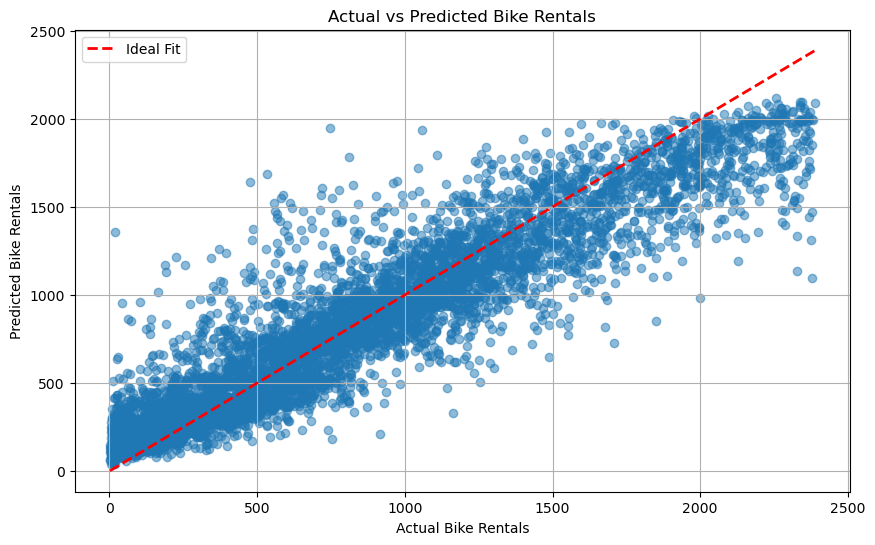

In [23]:
# Ok, this one uses HistGradientBoostingRegressor which works better and I think uses histograms? IDK mostly
# copied from the og GradientBoostedRegression which is in the next cell



from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
standardizedData = pd.read_csv('ProcessedData (1).csv')

X = standardizedData.drop('Rented Bike Count', axis=1) #X = feature matrix
y = standardizedData['Rented Bike Count'] #y = target variable

print("Shape of data:")
print("X shape:", X.shape)
print("y shape:", y.shape)


poly = PolynomialFeatures(degree=2, include_bias=False) 
X_poly = poly.fit_transform(X) #adding polynomial features to aid learning (iirc she said this helps in lecture)

#n_estimators = number of trees? I think? idk I did a lot of googling and kind of mashed stuff together
#increasing n_estimators increases r^2 significantly
#also currently a pretty high learning rate (which seems to be working) haven't really experimented with that
def optimized_gradient_boosting(X, y, folds, learning_rate=0.1, n_estimators=30):
    kf = KFold(n_splits=folds, shuffle=True, random_state=42) #split into folds for cross validation
    fold_mses = [] #just for documentation for the index of the best one
    models = []

    for train_index, val_index in kf.split(X): #loop through the folds
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        # Train Gradient Boosting Regressor
        from sklearn.ensemble import HistGradientBoostingRegressor

        gbr = HistGradientBoostingRegressor( 
            learning_rate=learning_rate,
            max_iter=n_estimators,
            random_state=42,
            early_stopping=True,
            validation_fraction=0.1,
            tol=1e-4
        )
        gbr.fit(X_train, y_train)

        # Predict and evaluate on the validation set
        y_pred = gbr.predict(X_val)
        mse = mean_squared_error(y_val, y_pred)
        fold_mses.append(mse)
        models.append(gbr)

    avg_mse = np.mean(fold_mses)
    print(f"\nAverage MSE across folds: {avg_mse:.4f}")
    return models[np.argmin(fold_mses)]  # Return the best model

# Train and get the best model
best_model = optimized_gradient_boosting(X_poly, y, folds=3)

# Final predictions
predictions = best_model.predict(X_poly)

# Clip predictions to prevent negatives
#Did this bc I was getting a lot of negative predictions and it would be practically impossible to sell negative
#bikes (unless someone gave one to you I guess)
predictions = np.clip(predictions, 0, None) 

# Calculate MSE and R^2
final_mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)

print(f"\nFinal MSE on full dataset: {final_mse:.4f}")
print(f"R^2: {r2:.4f}")

# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y, predictions, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Bike Rentals')
plt.ylabel('Predicted Bike Rentals')
plt.title('Actual vs Predicted Bike Rentals')
plt.legend()
plt.grid(True)
plt.show()


Shape of data:
X shape: (8159, 14)
y shape: (8159,)

Average MSE across folds: 72150.3399

Final MSE on full dataset: 67200.0228
R^2: 0.8065


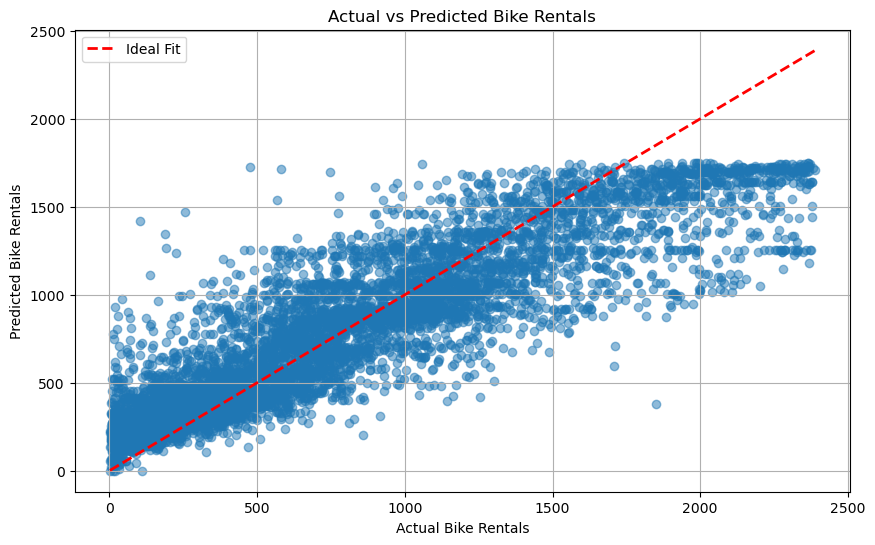

In [24]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
standardizedData = pd.read_csv('ProcessedData (1).csv')

X = standardizedData.drop('Rented Bike Count', axis=1) # X = feature matrix
y = standardizedData['Rented Bike Count'] # y = target variable

print("Shape of data:")
print("X shape:", X.shape)
print("y shape:", y.shape)

poly = PolynomialFeatures(degree=2, include_bias=False) 
X_poly = poly.fit_transform(X) # Adding polynomial features to aid learning

# n_estimators = number of trees? I think? 
# Increasing n_estimators increases r^2 significantly
# Also currently a pretty high learning rate (which seems to be working)
# Haven't really experimented with that

def optimized_gradient_boosting(X, y, folds, learning_rate=0.1, n_estimators=30):
    kf = KFold(n_splits=folds, shuffle=True, random_state=42) # Split into folds for cross-validation
    fold_mses = [] # Track MSE for each fold
    models = []

    for train_index, val_index in kf.split(X): # Loop through the folds
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        # Train Gradient Boosting Regressor
        gbr = GradientBoostingRegressor(
            learning_rate=learning_rate,
            n_estimators=n_estimators,
            random_state=42 #arbitrary, saw other sources using 42
        )
        gbr.fit(X_train, y_train)

        # Predict and evaluate on the validation set
        y_pred = gbr.predict(X_val)
        mse = mean_squared_error(y_val, y_pred)
        fold_mses.append(mse)
        models.append(gbr)

    avg_mse = np.mean(fold_mses)
    print(f"\nAverage MSE across folds: {avg_mse:.4f}")
    return models[np.argmin(fold_mses)]  # Return the best model

# Train and get the best model
best_model = optimized_gradient_boosting(X_poly, y, folds=3)

# Final predictions
predictions = best_model.predict(X_poly)

# Clip predictions to prevent negatives
# Did this because I was getting a lot of negative predictions 
# and it would be practically impossible to rent negative bikes
predictions = np.clip(predictions, 0, None) 

# Calculate MSE and R^2
final_mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)

print(f"\nFinal MSE on full dataset: {final_mse:.4f}")
print(f"R^2: {r2:.4f}")

# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y, predictions, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Bike Rentals')
plt.ylabel('Predicted Bike Rentals')
plt.title('Actual vs Predicted Bike Rentals')
plt.legend()
plt.grid(True)
plt.show()